# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

/kaggle/input/games-sales/Games Sales.csv


# Read the dataset

In [2]:
df = pd.read_csv('/kaggle/input/games-sales/Games Sales.csv')

df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


# Cleaning Data

## Change data types

In [3]:
df.dtypes

Name          object
Sales        float64
Series        object
Release       object
Genre         object
Developer     object
Publisher     object
dtype: object

The set has:

* Numerical columns: Sales
* Object columns: Name, Series, Release, Genre, Developer, Publisher

We need to change the types of **Release** to be **datetime** types. 

In [4]:
df['Release'] = pd.to_datetime(df['Release'])

In [5]:
#Let's check again
df.dtypes

Name                 object
Sales               float64
Series               object
Release      datetime64[ns]
Genre                object
Developer            object
Publisher            object
dtype: object

## Check Typo

In [6]:
#counts the number of the content is appears
for col_name in (['Developer', 'Genre', 'Series']):
    print(df[col_name].value_counts(), '')


Blizzard Entertainment             10
Maxis                               6
Paradox Development Studio          5
id Software                         4
Westwood Studios                    4
                                   ..
Kojima Productions                  1
Edmund McMillen & Florian Himsl     1
Landfall Games                      1
Keen Software House                 1
Microsoft                           1
Name: Developer, Length: 109, dtype: int64 
Real-time strategy                        26
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
                                          ..
Action role-playing game                   1
Maze, arcade                               1
Action-adventure, platformer               1
Action-adventure, Survival                 1
Space combat simulation                    1
Name: Genre, Length: 61, dtype: int64 
Star

## Check Missing Value

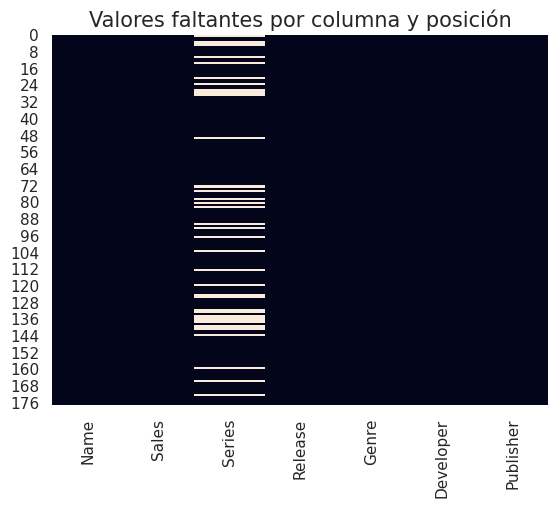

In [7]:
sns.heatmap(df.isnull(), cbar=False) 
plt.title('Valores faltantes por columna y posición', fontsize = 15)
plt.show()

In [8]:
#Fix the missing value
df = df.dropna()



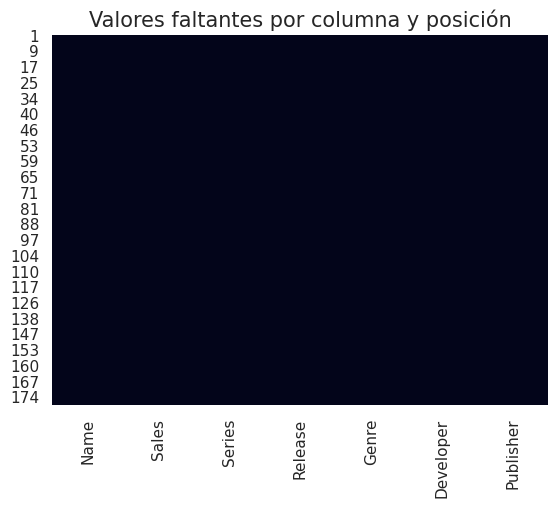

In [9]:
sns.heatmap(df.isnull(), cbar=False) 
plt.title('Valores faltantes por columna y posición', fontsize = 15)
plt.show()

Perfect!

# Analysis Using EDA

## 1. The Oldest and The Newest Games

In [10]:
Oldest = df.sort_values('Release', ascending = True)

#Specify the column we want to know
Oldest[['Name', 'Release']] [:1]

,Name,Release
133,Hydlide,1984-12-01


In [11]:
Newest = df.sort_values('Release', ascending = False)

#Specify the column we want to know
Newest[['Name', 'Release']] [:1]

,Name,Release
110,Crusader Kings III,2020-09-01


## 2. Publihser Published Most 

In [12]:
#First I want to create the list data before visualizing it 
publisher = df.groupby('Publisher')['Name'].count()
publisher = publisher.sort_values(ascending = False)
top5 = publisher.head()

top5


Publisher
Electronic Arts           19
Blizzard Entertainment    10
Activision                 6
GT Interactive             5
Paradox Interactive        4
Name: Name, dtype: int64

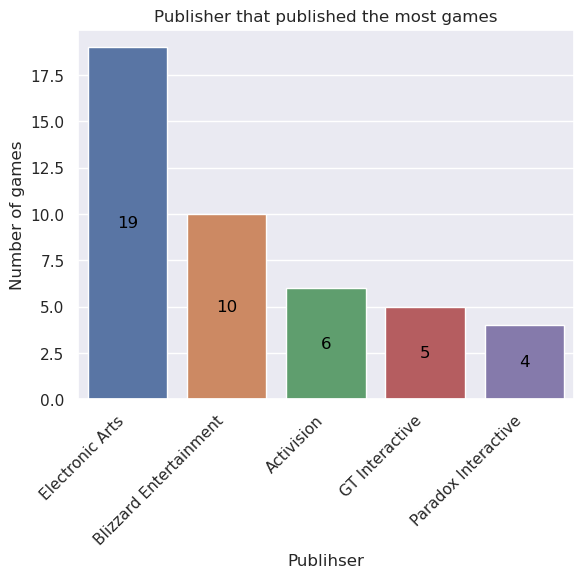

In [13]:
#Make it EDA
publisher = df.groupby('Publisher')['Name'].count()
publisher = publisher.sort_values(ascending = False)
top5 = publisher.head()

sns.barplot(x = top5.index, y = top5.values)
plt.title('Publisher that published the most games')
plt.ylabel('Number of games')
plt.xlabel('Publihser')

plt.xticks(rotation = 45, ha = 'right')

for i, count in enumerate(top5.values):
    plt.text(i, count/2, count, ha = 'center', va = 'center', color = 'black', fontweight = 'medium')

plt.show()



## 3. Developer Developed the most of games

In [14]:
#First I want to create the list data before visualizing it 
developer = df.groupby('Developer')['Name'].count()
developer = developer.sort_values(ascending = False)
top5 = developer.head()

top5

Developer
Blizzard Entertainment        10
Maxis                          6
id Software                    4
Capcom                         4
Paradox Development Studio     4
Name: Name, dtype: int64

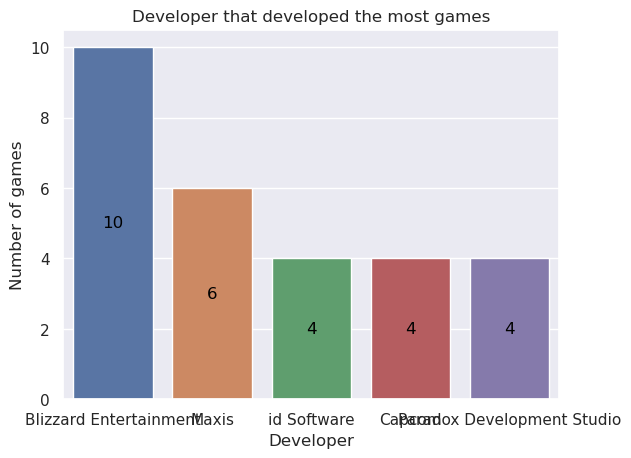

In [15]:
#Make it EDA
developer = df.groupby('Developer')['Name'].count()
developer = developer.sort_values(ascending = False)
top5 = developer.head()

sns.barplot(x = top5.index, y = top5.values)
plt.title('Developer that developed the most games')
plt.ylabel('Number of games')
plt.xlabel('Developer')

plt.xticks(rotation = 0, ha = 'center')

for i, count in enumerate(top5.values):
    plt.text(i, count/2, count, ha = 'center', va = 'center', color = 'black', fontweight = 'medium')

plt.show()


## 4. Series the most sales

In [16]:
#First I want to create the list data before visualizing it 

#count the sales of each series
series = df.groupby(['Series']).sum().reset_index()

#sort the series by sales
series = series.sort_values(by = 'Sales', ascending = False)

#show the top 5 list of series
top5 = series.head()
top5


,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
75,The Sims,24.0
36,Half-Life,21.0
68,StarCraft,21.0


NameError: name 'sales' is not defined

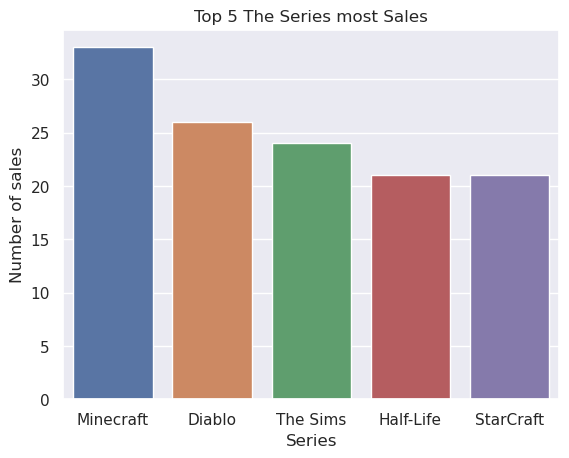

In [17]:
#Make it EDA

#count the sales of each series
series = df.groupby(['Series']).sum().reset_index()

#sort the series by sales
series = series.sort_values(by = 'Sales', ascending = False)

#show the top 5 list of series
top5 = series.head(5)

#set series as x label and sales as the y label

sns.barplot(x = 'Series', y = 'Sales', data = top5)
plt.title('Top 5 The Series most Sales')
plt.ylabel('Number of sales')
plt.xlabel('Series')

plt.xticks(rotation = 0, ha = 'center')

for i, count in enumerate(sales):
    plt.text(i, count/2, count, ha = 'center', va = 'center', color = 'black', fontweight = 'medium')
plt.show()




## 5. Series have the Most Games

In [ ]:
#First I want to create the list data before visualizing it 

#count the series of each game's Name
name = df.groupby('Series')['Name'].nunique()

#sort the Name by series
name = name.sort_values(ascending = False)

#show the top 5 list of series
top5 = name.head()

top5

In [ ]:
#First I want to create the list data before visualizing it 

#count the series of each game's Name
name = df.groupby('Series')['Name'].nunique()

#sort the Name by series
name = name.sort_values(ascending = False)

#show the top 5 list of series
top = name.head()

#set Name as x label and Count of Series as the y label

sns.barplot(x = top.index, y = top)
plt.title('Series have the Most Games')
plt.ylabel('Number of Games')
plt.xlabel("Series")

plt.xticks(rotation = 0, ha = 'center')

for i, count in enumerate(top5):
    plt.text(i, count/2, count, ha = 'center', va = 'center', color = 'black', fontweight = 'medium')
plt.show()

